In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Explore Data

In [3]:
data=pd.read_csv('/kaggle/input/chronic-kidney-disease-ehrs-abu-dhabi/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')
data

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.80,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.40,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.40,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.10,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.00,70.0,79.7,132,63,31,105,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,25,0,0,0,0,0,0,0,0,...,0,5.30,73.0,122.6,127,74,24,102,0,9
487,1,45,0,0,0,0,1,0,1,0,...,0,5.90,67.0,110.3,150,112,33,94,0,8
488,1,44,1,0,0,0,0,1,1,1,...,0,6.41,66.3,111.6,126,83,35,0,0,0
489,1,41,0,0,1,1,1,1,0,1,...,1,4.00,93.0,87.6,119,66,22,35,1,3


In [4]:
data.isna().sum()

Sex                    0
AgeBaseline            0
HistoryDiabetes        0
HistoryCHD             0
HistoryVascular        0
HistorySmoking         0
HistoryHTN             0
HistoryDLD             0
HistoryObesity         0
DLDmeds                0
DMmeds                 0
HTNmeds                0
ACEIARB                0
CholesterolBaseline    0
CreatinineBaseline     0
eGFRBaseline           0
sBPBaseline            0
dBPBaseline            0
BMIBaseline            0
TimeToEventMonths      0
EventCKD35             0
TIME_YEAR              0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eGFRBaseline         491 non-null    flo

In [7]:
data.describe()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.509165,53.203666,0.437882,0.091650,0.059063,0.152749,0.682281,0.645621,0.505092,0.551935,...,0.446029,4.978574,67.856823,98.116090,131.374745,76.871690,30.183299,83.065173,0.114053,6.940937
std,0.500426,13.821282,0.496632,0.288825,0.235983,0.360113,0.466064,0.478812,0.500484,0.497803,...,0.497586,1.096702,17.918627,18.503267,15.692650,10.711134,6.236742,26.011140,0.318200,2.201710
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.230000,6.000000,60.000000,92.000000,41.000000,13.000000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.200000,55.000000,86.400000,121.000000,69.000000,26.000000,77.000000,0.000000,6.000000
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,5.000000,66.000000,98.100000,131.000000,77.000000,30.000000,93.000000,0.000000,8.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.770000,78.500000,109.500000,141.000000,83.000000,33.000000,100.000000,0.000000,8.000000
max,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.300000,123.000000,242.600000,180.000000,112.000000,57.000000,111.000000,1.000000,9.000000


In [8]:
data.drop(['TIME_YEAR','TimeToEventMonths'],inplace=True,axis=1)
data

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,EventCKD35
0,0,64,0,0,0,0,1,1,1,1,0,1,0,4.80,59.0,93.3,144,87,40,0
1,0,52,0,0,0,0,1,1,1,0,0,1,0,6.40,52.0,105.8,148,91,45,0
2,0,56,0,0,0,0,1,1,1,1,0,1,0,6.40,57.0,99.8,149,86,41,0
3,0,58,0,0,0,0,0,1,1,1,0,0,0,5.10,65.0,90.3,116,68,32,0
4,0,63,1,0,0,0,1,1,1,1,1,1,1,5.00,70.0,79.7,132,63,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,25,0,0,0,0,0,0,0,0,0,0,0,5.30,73.0,122.6,127,74,24,0
487,1,45,0,0,0,0,1,0,1,0,0,0,0,5.90,67.0,110.3,150,112,33,0
488,1,44,1,0,0,0,0,1,1,1,1,0,0,6.41,66.3,111.6,126,83,35,0
489,1,41,0,0,1,1,1,1,0,1,0,1,1,4.00,93.0,87.6,119,66,22,1


# Data Visualization

In [9]:
numeric_col=['AgeBaseline','CholesterolBaseline','CreatinineBaseline','eGFRBaseline','sBPBaseline','dBPBaseline','BMIBaseline']
categorical_col=list(set(data.columns)-set(['EventCKD35'])-set(numeric_col))
categorical_col

['HistoryHTN ',
 'DLDmeds',
 'ACEIARB',
 'HistoryDLD',
 'HistoryCHD',
 'HistoryDiabetes',
 'HistorySmoking',
 'HTNmeds',
 'Sex',
 'DMmeds',
 'HistoryVascular',
 'HistoryObesity']

In [10]:
len(numeric_col)

7

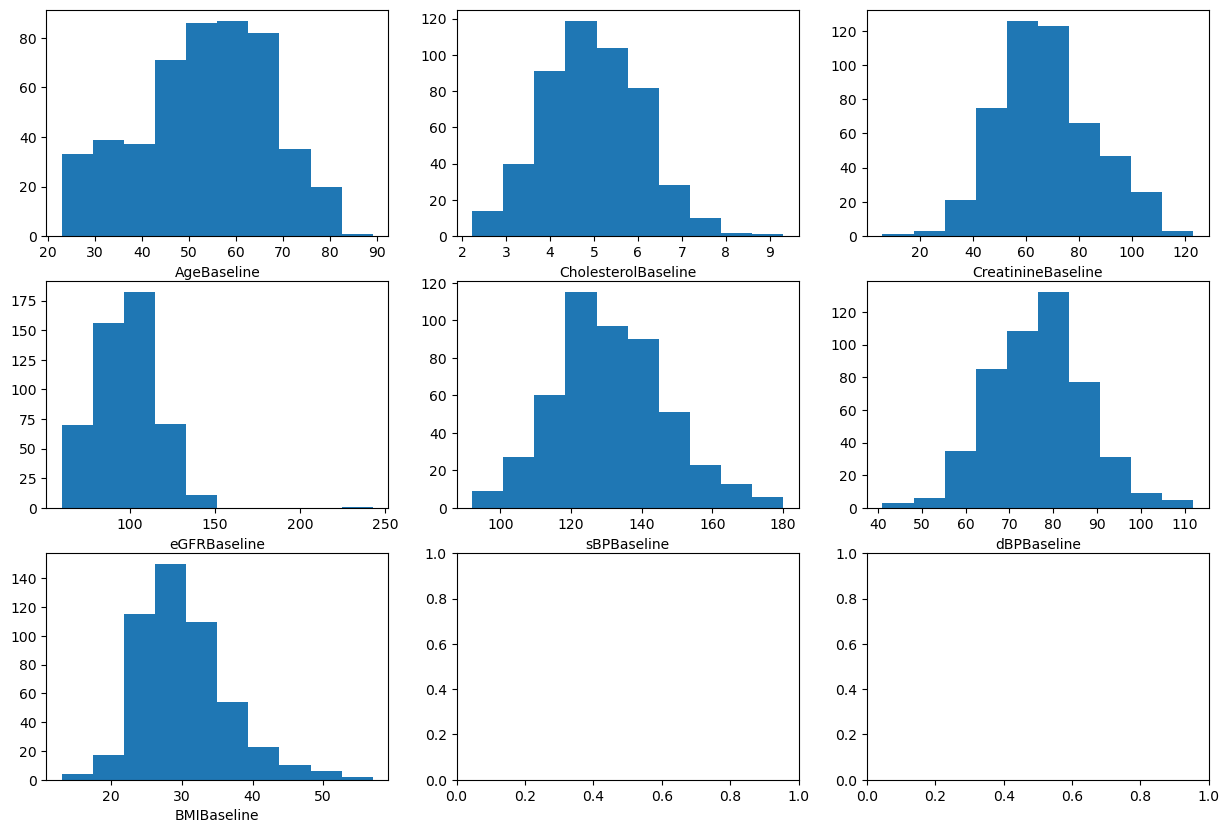

In [11]:
_, ax = plt.subplots(3, 3, figsize=(15,10))
for i in range(len(numeric_col)):
    ax[i//3,i%3].hist(data[numeric_col[i]])
    ax[i//3,i%3].set_xlabel(numeric_col[i])

In [12]:
len(categorical_col)

12

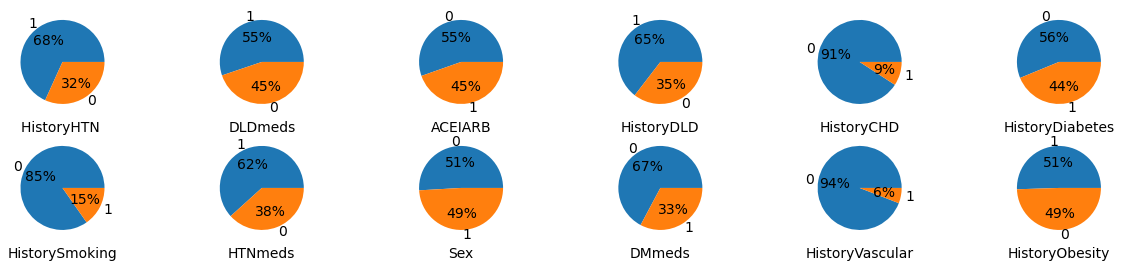

In [13]:
_, ax = plt.subplots(2, 6, figsize=(15,3))
for i in range(len(categorical_col)):
    fracs=list(data[categorical_col[i]].value_counts().values)
    ax[i//6,i%6].pie(x=fracs,labels=data[categorical_col[i]].unique(),autopct='%.0f%%')
    ax[i//6,i%6].set_xlabel(categorical_col[i])

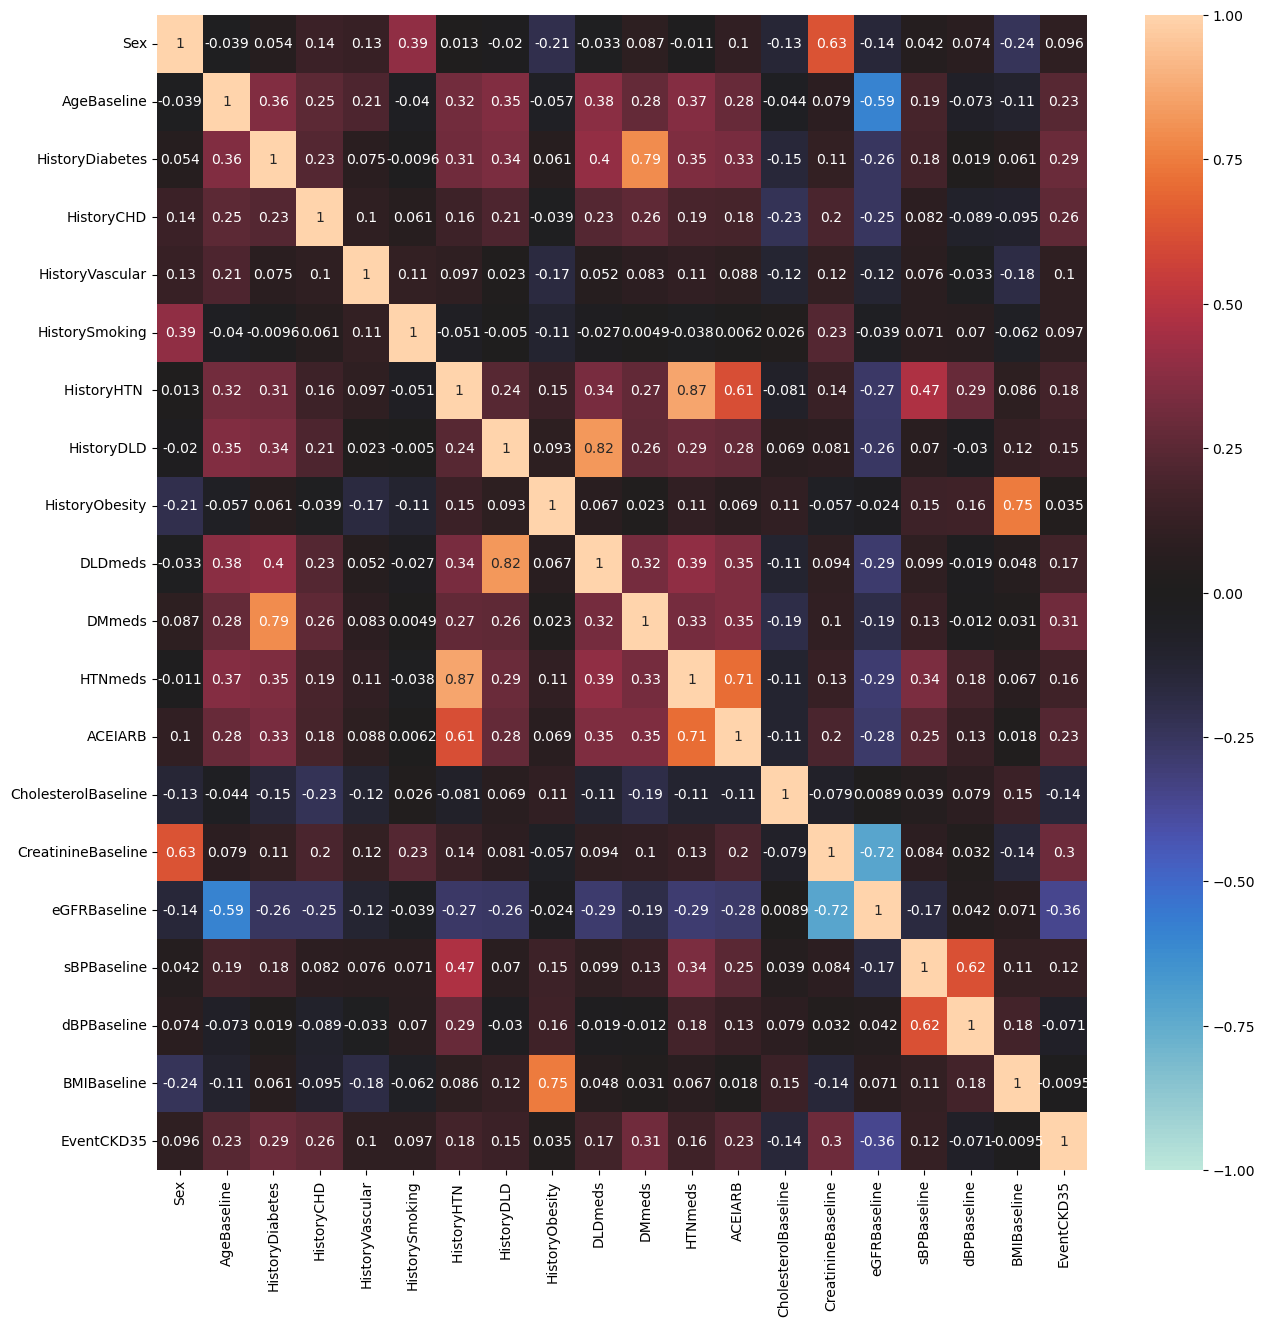

In [14]:
plt.figure(figsize=(15,15))
pearson_corr=data.corr()
sns.heatmap(pearson_corr,vmin=-1,center=0,vmax=1,annot=True)
plt.show()

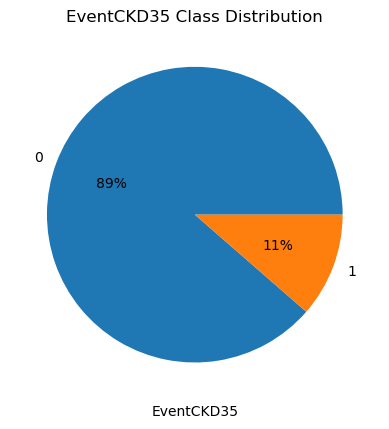

In [15]:
plt.pie(x=data['EventCKD35'].value_counts().values,labels=data['EventCKD35'].unique(),autopct='%.0f%%')
plt.xlabel('EventCKD35')
plt.title('EventCKD35 Class Distribution')
plt.show()

unbalanced class on target variable

# Data Preprocessing

In [16]:
X=data.drop(['EventCKD35'],axis=1)
y=data['EventCKD35']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [18]:
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
x_train[numeric_col]=scaler.fit_transform(x_train[numeric_col])
x_train

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
140,1,0.515152,0,0,0,0,1,1,0,1,0,1,0,0.179632,0.547009,0.213854,0.625000,0.761194,0.318182
433,1,0.833333,0,0,0,1,1,1,0,1,0,1,1,0.561528,0.538462,0.141836,0.465909,0.537313,0.204545
416,1,0.272727,0,0,0,0,0,1,0,0,0,0,0,0.405941,0.726496,0.160528,0.181818,0.373134,0.340909
489,1,0.272727,0,0,1,1,1,1,0,1,0,1,1,0.250354,0.743590,0.147883,0.306818,0.313433,0.204545
25,1,0.651515,0,0,1,0,0,1,0,0,0,0,0,0.844413,0.837607,0.019241,0.443182,0.537313,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0.409091,0,0,0,0,1,1,0,1,0,0,0,0.321075,0.512821,0.181968,0.590909,0.746269,0.318182
270,0,0.454545,1,0,0,0,0,1,1,1,1,0,0,0.603960,0.572650,0.113249,0.227273,0.253731,0.431818
348,1,0.696970,1,1,0,0,1,1,0,1,1,1,1,0.349364,0.564103,0.163826,0.602273,0.656716,0.227273
435,1,0.196970,1,0,0,1,1,1,1,1,0,1,0,0.490806,0.777778,0.140187,0.806818,0.970149,0.590909


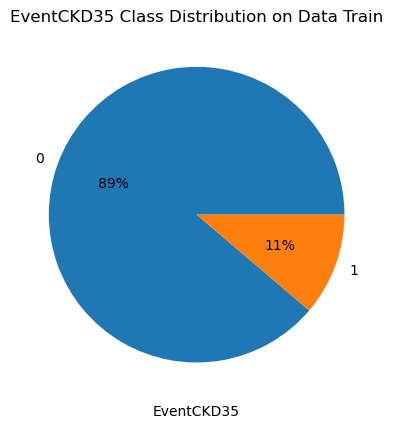

In [20]:
plt.pie(x=y_train.value_counts().values,labels=y_train.unique(),autopct='%.0f%%')
plt.xlabel('EventCKD35')
plt.title('EventCKD35 Class Distribution on Data Train')
plt.show()

In [21]:
x_val[numeric_col]=scaler.transform(x_val[numeric_col])
x_val

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline
452,1,0.060606,0,0,0,0,0,0,0,0,0,0,0,0.264498,0.589744,0.323255,0.238636,0.253731,0.227273
84,0,0.500000,0,0,0,0,0,1,0,1,0,0,0,0.306931,0.358974,0.246839,0.375000,0.432836,0.272727
434,1,0.545455,1,0,1,0,1,0,0,0,1,1,1,0.179632,0.666667,0.146234,0.443182,0.432836,0.272727
474,1,0.848485,1,1,1,0,1,1,0,1,1,1,1,0.335219,0.735043,0.040132,0.477273,0.358209,0.250000
428,1,0.484848,1,0,0,0,1,1,1,1,1,1,1,0.618105,0.735043,0.108301,0.568182,0.656716,0.431818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,0.590909,1,0,0,0,1,1,1,1,1,1,1,0.377652,0.598291,0.177570,0.511364,0.761194,0.431818
56,0,0.287879,1,0,0,0,1,0,1,0,0,0,0,0.250354,0.299145,0.341396,0.602273,0.522388,0.477273
275,0,0.121212,0,0,0,0,0,0,1,0,0,0,0,0.278642,0.196581,0.483233,0.454545,0.492537,0.386364
398,1,0.151515,0,0,0,1,0,1,0,0,0,0,0,0.618105,0.564103,0.306762,0.193182,0.388060,0.340909


In [22]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

In [23]:
#Oversample Data Train
x_train,y_train=sm.fit_resample(x_train,y_train)

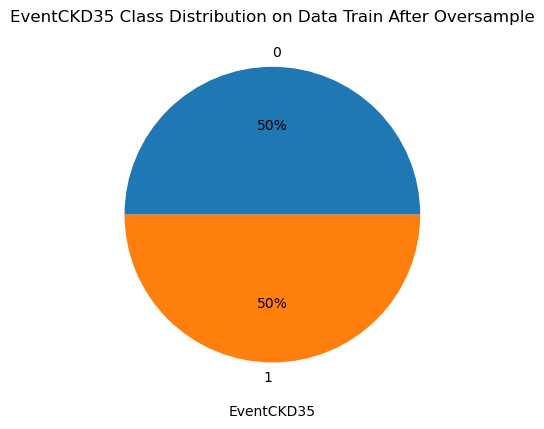

In [24]:
plt.pie(x=y_train.value_counts().values,labels=y_train.unique(),autopct='%.0f%%')
plt.xlabel('EventCKD35')
plt.title('EventCKD35 Class Distribution on Data Train After Oversample')
plt.show()

# Build Neural Network Model

In [25]:
def build_model():
    model=keras.Sequential()
    model.add(keras.Input(shape=(X.shape[1],)))
    model.add(keras.layers.Dense(16,activation='relu'))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    
    opt=keras.optimizers.Adam(weight_decay=1e-2)
    #using focalcrossentropy loss resulting in more attention to hard example rather than the easy one https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryFocalCrossentropy
    #using Recall = tp/tp+fn to see how well model minimize False Negative
    model.compile(optimizer=opt,loss=keras.losses.BinaryFocalCrossentropy(),metrics=[tf.keras.metrics.Recall()])
    return model

In [26]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [27]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=1,restore_best_weights=True,mode='max')
lr_scheduler=keras.callbacks.ReduceLROnPlateau(monitor='val_recall',patience=3,verbose=1,factor=0.5,min_lr=1e-5,mode='max')

In [28]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=400,batch_size=64,callbacks=[early_stop,lr_scheduler])

Epoch 1/400
11/11 [==============================] - 2s 35ms/step - loss: 0.1632 - recall: 0.7672 - val_loss: 0.1815 - val_recall: 0.8333 - lr: 0.0010
Epoch 2/400
11/11 [==============================] - 0s 6ms/step - loss: 0.1561 - recall: 0.7356 - val_loss: 0.1682 - val_recall: 0.7500 - lr: 0.0010
Epoch 3/400
11/11 [==============================] - 0s 6ms/step - loss: 0.1512 - recall: 0.7126 - val_loss: 0.1647 - val_recall: 0.6667 - lr: 0.0010
Epoch 4/400
 1/11 [=>............................] - ETA: 0s - loss: 0.1436 - recall: 0.7778
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
11/11 [==============================] - 0s 6ms/step - loss: 0.1466 - recall: 0.6983 - val_loss: 0.1563 - val_recall: 0.6667 - lr: 0.0010
Epoch 5/400
11/11 [==============================] - 0s 6ms/step - loss: 0.1437 - recall: 0.6954 - val_loss: 0.1552 - val_recall: 0.6667 - lr: 5.0000e-04
Epoch 6/400
11/11 [==============================] - 0s 6ms/step - loss: 0.1419 - recall

# Inference

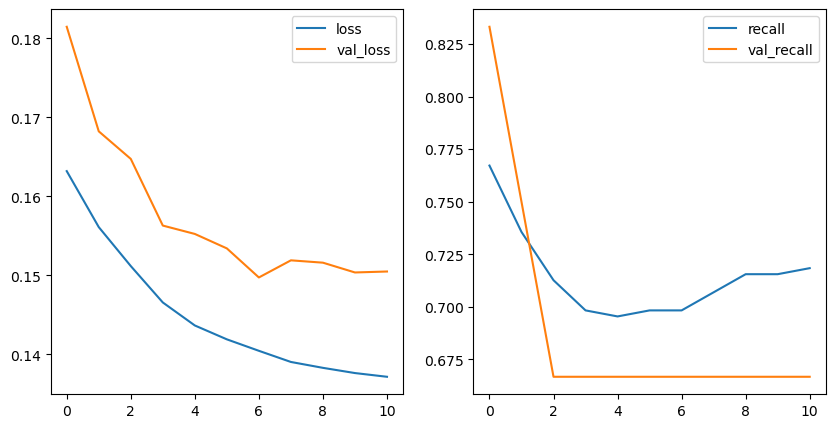

In [29]:
_, ax = plt.subplots(1, 2, figsize=(10,5))
loss = history.history['loss']
val_loss = history.history['val_loss']
recall=history.history['recall']
val_recall=history.history['val_recall']
epochs = range(len(loss))

ax[0].plot(epochs, loss)
ax[0].plot(epochs, val_loss)
ax[0].legend(['loss', 'val_loss'], loc='upper right')

ax[1].plot(epochs, recall)
ax[1].plot(epochs, val_recall)
ax[1].legend(['recall', 'val_recall'], loc='upper right')

In [30]:
recall=model.evaluate(x_val,y_val)[1]
print("Recall:", recall)

4/4 [==============================] - 0s 4ms/step - loss: 0.1815 - recall: 0.8333
Recall: 0.8333333134651184


In [31]:
y_pred=model.predict(x_val)
y_pred=np.round(y_pred)

4/4 [==============================] - 0s 3ms/step


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


def evaluation_parametrics(name,y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Validation\n")
    print(classification_report(y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Machine Learning - Classification------------------------


Classification Report for Data Validation

              precision    recall  f1-score   support

           0       0.95      0.47      0.63        87
           1       0.18      0.83      0.29        12

    accuracy                           0.52        99
   macro avg       0.57      0.65      0.46        99
weighted avg       0.86      0.52      0.59        99

--------------------------------------------------------------------------


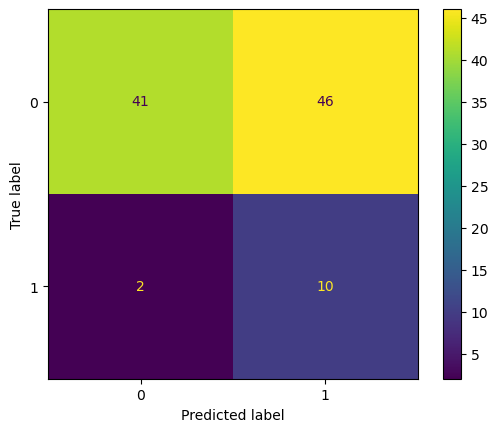

In [33]:
evaluation_parametrics("Machine Learning - Classification", y_val, y_pred)

# Note: the reason i'm using Recall metrics here is to minimize False Negative/underestimation, because if we incorrectly guess a patient with CKD using our model, it can lead to bad end